In [52]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [53]:
data = pd.read_csv('s3://helen-ml/week-4/AirPassengers.csv', index_col=0)
data.head()

,time,value
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


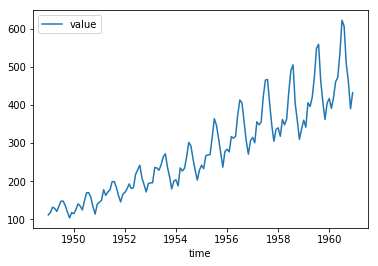

In [54]:
data.set_index('time').plot()
plt.show()

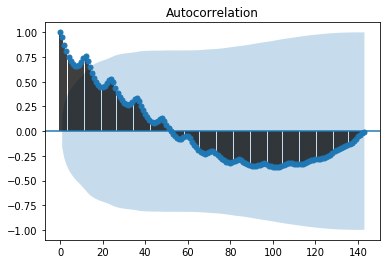

In [55]:
plot_acf(data.set_index('time')['value'])
plt.show()

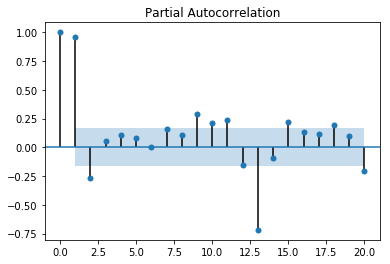

In [56]:
plot_pacf(data.set_index('time')['value'], lags=20)
plt.show()

# Model is not stationary - use differencing

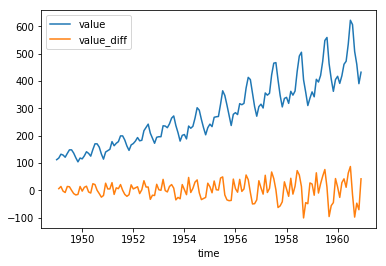

In [57]:
data.set_index('time', inplace=True)
data['value_diff'] = data['value'].diff()

data.plot()
plt.show()

# Trend was removed, but variance is not constant - transform using log()

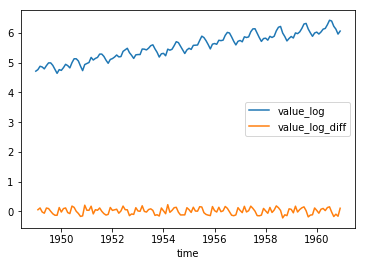

In [58]:
data['value_log'] = data['value'].apply(lambda x: math.log(x))
data['value_log_diff'] = data['value_log'].diff()

data[['value_log', 'value_log_diff']].plot()
plt.show()

In [59]:
data.head()

,value,value_diff,value_log,value_log_diff
time,,,,
1949.000000,112,NaN,4.718499,NaN
1949.083333,118,6.0,4.770685,0.052186
1949.166667,132,14.0,4.882802,0.112117
1949.250000,129,-3.0,4.859812,-0.022990
1949.333333,121,-8.0,4.795791,-0.064022


In [60]:
# we cannot calculate a diff for the first row, so we need
# to skip the NaN values
data_nn = data[data.value_log_diff.notnull()]

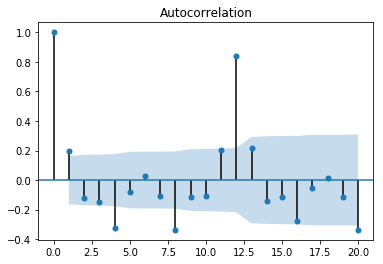

In [61]:
plot_acf(data_nn['value_log_diff'], lags=20)
plt.show()

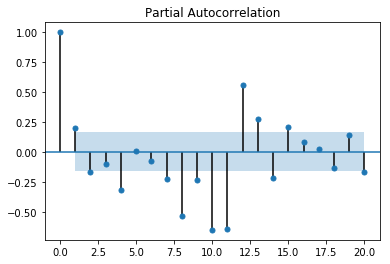

In [62]:
plot_pacf(data_nn['value_log_diff'], lags=20)
plt.show()

# split into training and test sets

In [73]:
split_index = int(2/3 * len(data_nn))
print('Data set size: %s' % len(data_nn))
print('Split at: %s' % split_index)
training = data_nn.iloc[:split_index]
test = data_nn.iloc[split_index+1:]

print("Training:")
print(training.head())
print("Test:")
print(test.head())

Data set size: 143
Split at: 95
Training:
             value  value_diff  value_log  value_log_diff
time                                                     
1949.083333    118         6.0   4.770685        0.052186
1949.166667    132        14.0   4.882802        0.112117
1949.250000    129        -3.0   4.859812       -0.022990
1949.333333    121        -8.0   4.795791       -0.064022
1949.416667    135        14.0   4.905275        0.109484
Test:
             value  value_diff  value_log  value_log_diff
time                                                     
1957.083333    301       -14.0   5.707110       -0.045462
1957.166667    356        55.0   5.874931        0.167820
1957.250000    348        -8.0   5.852202       -0.022728
1957.333333    355         7.0   5.872118        0.019915
1957.416667    422        67.0   6.045005        0.172888


In [75]:
model = AR(training['value_log_diff'].values)
model_fit = model.fit(2)

print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 2
Coefficients: [ 0.00950802  0.19063787 -0.20094318]
